In [2]:

from google.colab import drive

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:

train.shape

(614, 13)

In [7]:
train.Loan_Status = train.Loan_Status.map({'Y':1,'N':0})
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [9]:
Loan_Status = train.Loan_Status                            # store loan status in variable in Loan_status
train.drop('Loan_Status',axis=1,inplace=True)              # drop loan status column from train data
Loan_ID = test.Loan_ID                                     # store loan id in variable Loan_ID
data = pd.concat([train, test])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [10]:
data.shape

(981, 12)

In [11]:

duplicate = data[data.duplicated()]
duplicate.shape

(0, 12)

<Axes: >

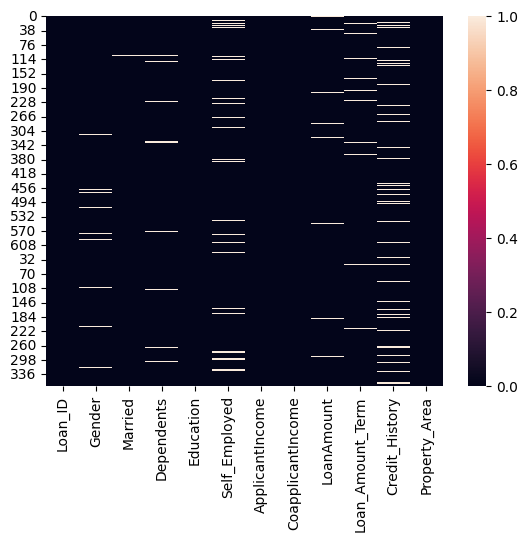

In [12]:
sns.heatmap(data.isnull())

In [13]:

data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [14]:
data.fillna(data.mean(numeric_only=True).round(1), inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)                   # replace missing values with the mode
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [15]:

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

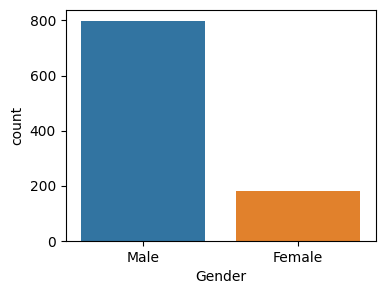

In [16]:

plt.figure(figsize=(4, 3))
sns.countplot(x='Gender', data=data)

<Axes: xlabel='Married', ylabel='count'>

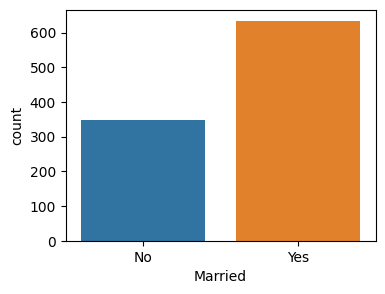

In [17]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Married', data=data)

<Axes: xlabel='Dependents', ylabel='count'>

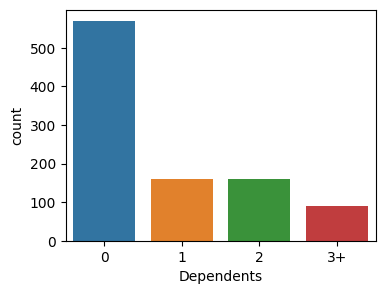

In [18]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Dependents', data=data)

<Axes: xlabel='Property_Area', ylabel='count'>

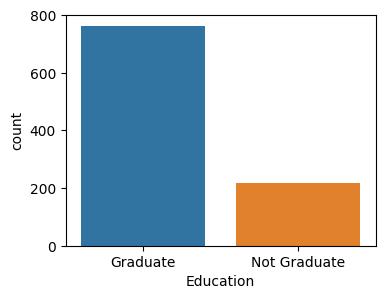

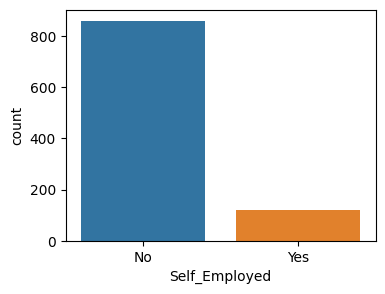

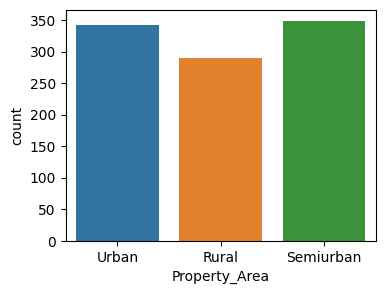

In [19]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Education', data=data)

plt.figure(figsize=(4, 3))
sns.countplot(x='Self_Employed', data=data)

plt.figure(figsize=(4, 3))
sns.countplot(x='Property_Area', data=data)

In [20]:

data['Dependents'].value_counts()

0     570
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [21]:
data.replace(to_replace='3+', value=4, inplace=True)
data['Dependents'].value_counts()

0    570
1    160
2    160
4     91
Name: Dependents, dtype: int64

In [22]:
data.replace({'Married':{'Yes':1, 'No':0},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1, 'No':0},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

data.drop('Loan_ID',inplace=True,axis=1)

In [23]:
x = data.iloc[:614,]                #all the data in x (training set)
y = Loan_Status

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1,1,1,1,0,5649,0.0,44.0,360.0,1.0,2
272,1,0,0,1,0,2833,1857.0,126.0,360.0,1.0,0
474,1,0,2,1,0,5532,4648.0,162.0,360.0,1.0,0
382,0,0,0,1,0,6000,0.0,156.0,360.0,1.0,2
283,0,0,0,1,0,1811,1666.0,54.0,360.0,1.0,2


In [25]:

x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1,0,0,1,1,7085,0.0,84.0,360.0,1.0,1
52,0,0,0,1,0,4230,0.0,112.0,360.0,1.0,1
536,1,1,0,1,0,6133,3906.0,324.0,360.0,1.0,2
469,1,1,0,1,0,4333,2451.0,110.0,360.0,1.0,2
55,1,1,2,1,0,2708,1167.0,97.0,360.0,1.0,1


In [26]:

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((460, 11), (154, 11), (460,), (154,))

In [27]:

models=[]                                 # empty list created

models.append(("Logistic Regression",LogisticRegression()))                     # append various models
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Nearest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))
scoring = 'accuracy'


In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [29]:

result = []
names = []

In [30]:

for name, model in models:
    kfold = KFold(n_splits=10, random_state=0, shuffle = True)
    cv_result = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f" % (name, cv_result.mean()))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression 0.793478
Decision Tree 0.700000
Linear Discriminant Analysis 0.802174
Random Forest 0.776087
Support Vector Classifier 0.671739
K- Nearest Neighbour 0.641304
Naive Bayes 0.791304


In [31]:
LDA = LinearDiscriminantAnalysis()                        # create model
LDA.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [36]:
pred = LDA.predict(x_test)                                              # test model
print("Model Accuracy:- ", accuracy_score(y_test, pred))
print("Confusion matrix:",confusion_matrix(y_test, pred))                                # print confusion matrix


Model Accuracy:-  0.8376623376623377
Confusion matrix: [[ 20  23]
 [  2 109]]


In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



In [32]:
final_test = data.iloc[614:,]
final_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0.0,110.0,360.0,1.0,2
1,1,1,1,1,0,3076,1500.0,126.0,360.0,1.0,2
2,1,1,2,1,0,5000,1800.0,208.0,360.0,1.0,2
3,1,1,2,1,0,2340,2546.0,100.0,360.0,0.8,2
4,1,0,0,0,0,3276,0.0,78.0,360.0,1.0,2


In [38]:
prediction = LDA.predict(final_test)
print(prediction)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [40]:
predicted_data = pd.DataFrame({"Loan_ID": Loan_ID, "Predicted_Status" : prediction})
predicted_data.shape

(367, 2)

In [41]:
predicted_data.head(10)

,Loan_ID,Predicted_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1
